In [28]:
import tensorflow


In [3]:


_PCVERSION_=True


if _PCVERSION_:
    basedir="C:/Users/sipocz/OneDrive/Dokumentumok/GitHub/_EarthQuake/gpos_lin"
else:
    from google.colab import drive
    drive.mount('/content/drive',force_remount=True)
    basedir="/content/drive/My Drive/001_AI/_EarthQuake/gpos_lin"

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


#--------------scikit import 
from sklearn.ensemble import IsolationForest
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
#--------------

def outlierStatistic(X_train_predict):
    print(X_train_predict)
    maxX=len(X_train_predict)
    outlier=0
    for i in X_train_predict:
        if i==-1:
            outlier+=1
    print(f"A összes ({maxX} darabból {outlier} darab outlier van. Az {outlier/maxX*100:5.1f} %.)")


def checkvalues(df,columnname,key):
    print(f"{columnname} ellenőrzése !")
    numok=0
    numerr=0
    for i in df.index:
        if df.at[i,columnname] in key:
            #print(df.at[i,columnname])
            numok+=1
            pass
        else:
            numerr+=1
            print(df.at[i,columnname],end=", ")
    sumall=numok+numerr
    print(f"\n{sumall} mintából {numerr} db nem volt megfelelő")


def createcolumn(df,columnname,keys):
    print(f"{columnname} cseréje megy")
    for key in keys:
        df[keys[key]]=0
    for key in keys:
        for i in df.index:
            if df.at[i,columnname]==key:
                df.at[i,keys[key]]=1


def create_dict(idx,list):
    o={}
    for i in list:
        o[i]=idx+"_"+str(i)
    return o

def create_base_data(df):
    t=['n', 't', 'o']
    columnname="land_surface_condition"
    key=create_dict(columnname,t)


    #checkvalues(df,columnname,key)
    createcolumn(df,columnname,key)

    t= ['h', 'w', 'i', 'r', 'u']
    columnname="foundation_type"
    key=create_dict(columnname,t)

    #checkvalues(df,columnname,key)
    createcolumn(df,columnname,key)

    t=  ['q', 'n', 'x']
    columnname="roof_type"
    key=create_dict(columnname,t)

    #checkvalues(df,columnname,key)
    createcolumn(df,columnname,key)

    t=  ['z', 'v', 'f', 'm', 'x']
    columnname="ground_floor_type"
    key=create_dict(columnname,t)

    #checkvalues(df,columnname,key)
    createcolumn(df,columnname,key)

    t=   ['q', 's', 'j', 'x']
    columnname="other_floor_type"
    key=create_dict(columnname,t)

    #checkvalues(df,columnname,key)
    createcolumn(df,columnname,key)

    t=   ['j', 's', 't', 'o']
    columnname="position"
    key=create_dict(columnname,t)

    #checkvalues(df,columnname,key)
    createcolumn(df,columnname,key)

    t=   ['c', 's', 'f', 'd', 'm', 'a', 'q', 'u', 'n', 'o']
    columnname="plan_configuration"
    key=create_dict(columnname,t)

    #checkvalues(df,columnname,key)
    createcolumn(df,columnname,key)

    t=['a', 'w', 'r', 'v']
    columnname="legal_ownership_status"
    key=create_dict(columnname,t)

    #checkvalues(df,columnname,key)
    createcolumn(df,columnname,key)

    # level 1: 0-30, level 2: 0-1427, level 3: 0-12567.
    # level1:0--30
    # level2: 0.0000-----------0.9999
    # level3: 0.000000000------0.000099999
    '''
    l1=df.geo_level_1_id
    l2=(df.geo_level_2_id/1427*9999)/10000
    l3=(df.geo_level_2_id/12567*99999)/1000000000
    df["geopos"]=l1+l2+l3
    '''
    return(df)



def kill_columns(df):
    notkey=["Unnamed: 0","building_id","legal_ownership_status", "land_surface_condition",	"foundation_type",	"roof_type",	"ground_floor_type",	"other_floor_type",	"position",	"plan_configuration"]
    for i in df.columns:
        #print(i)
        if i in notkey:
            df.drop(columns=[i], inplace=True)
    return df







In [4]:
def check_similarity_np(np1,np2):
    db=0
    maxi=0
    for ind, i1 in enumerate(np1):
        maxi+=1
        i2=np2[ind]
        if i1!=i2:
            db+=1
    #print(f"{ind}. eset:  {i:3},{i2:3}")
    print(f"hiba:{db} max:{maxi} -- error:{db/maxi*100.0 : 2.6} good %:{100-db/maxi*100.0 : 2.6} %")
    return(1-db/maxi)

In [5]:

features_train=basedir+"/orig/train_values.csv"
labels_train=basedir+"/orig/train_labels.csv"
features_predict=basedir+"/orig/test_values.csv"
X_train=pd.read_csv(features_train)
X_pred=pd.read_csv(features_predict)
y_train=pd.read_csv(labels_train)



In [6]:
X_train.columns

Index(['building_id', 'geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id',
       'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage',
       'land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'legal_ownership_status', 'count_families', 'has_secondary_use',
       'has_secondary_use_agriculture', 'has_secondary_use_hotel',
       'has_secondary_use_rental', 'has_secondary_use_institution',
       'has_secondary_use_school', 'has_secondary_use_i

In [7]:
added=pd.concat([X_train.geo_level_1_id,X_train.geo_level_2_id,X_train.geo_level_3_id,y_train.damage_grade], axis=1)

In [8]:
#added

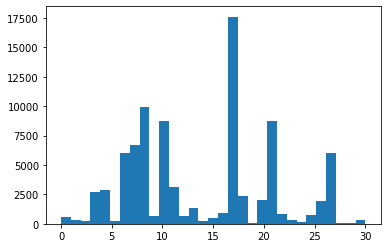

In [9]:
a=plt.hist(added.geo_level_1_id.where(added.damage_grade==3),bins=31)

In [10]:
len(a[0])

31

In [11]:
quake_effect={}
maxi=max(a[0])
for inx,val in enumerate(a[0]):
    quake_effect[inx]=1-(maxi-val)/maxi

In [12]:
eartquakeDist=[]
for idx,i in enumerate(X_train.geo_level_1_id):
    eartquakeDist.append(quake_effect[X_train.geo_level_1_id[idx]])

eartquakeDist2=[]
for idx,i in enumerate(X_pred.geo_level_1_id):
    eartquakeDist2.append(quake_effect[X_pred.geo_level_1_id[idx]])

In [13]:
eartquakeDist2[0]

1.0

In [14]:
added2=pd.concat([X_train.geo_level_1_id,X_train.geo_level_2_id,X_train.geo_level_3_id,y_train.damage_grade,pd.DataFrame(eartquakeDist,columns=["QuakeForce"])], axis=1)

#X_train_geolevel=pd.concat([X_train,pd.DataFrame(eartquakeDist,columns=["QuakeForce"])], axis=1)
#X_pred_geolevel=pd.concat([X_pred,pd.DataFrame(eartquakeDist2,columns=["QuakeForce"])], axis=1)



In [15]:
X_pred_conv=create_base_data(X_pred)
X_train_conv=create_base_data(X_train)



land_surface_condition cseréje megy
foundation_type cseréje megy
roof_type cseréje megy
ground_floor_type cseréje megy
other_floor_type cseréje megy
position cseréje megy
plan_configuration cseréje megy
legal_ownership_status cseréje megy
land_surface_condition cseréje megy
foundation_type cseréje megy
roof_type cseréje megy
ground_floor_type cseréje megy
other_floor_type cseréje megy
position cseréje megy
plan_configuration cseréje megy
legal_ownership_status cseréje megy


In [16]:
#--------------------------

In [17]:
#
X_train_ok=kill_columns(X_train_conv)
X_pred_ok=kill_columns(X_pred_conv)
y_train_ok=kill_columns(y_train)



X_train_ok.to_csv(basedir+"/tmp/X_tran_ok.csv",index=False)
X_pred_ok.to_csv(basedir+"/tmp/X_pred_ok.csv",index=False)
y_train_ok.to_csv(basedir+"/tmp/y_train_ok.csv",index=False)




#f=open(basedir+"/tmp/similarity.csv","a")
X_train_ok=pd.read_csv(basedir+"/tmp/X_tran_ok.csv",)
X_pred_ok=pd.read_csv(basedir+"/tmp/X_pred_ok.csv")
y_train_ok=pd.read_csv(basedir+"/tmp/y_train_ok.csv")

X_train_ok.head()
X_pred_ok.head()
#print("Ready")

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,...,plan_configuration_m,plan_configuration_a,plan_configuration_q,plan_configuration_u,plan_configuration_n,plan_configuration_o,legal_ownership_status_a,legal_ownership_status_w,legal_ownership_status_r,legal_ownership_status_v
0,17,596,11307,3,20,7,6,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,6,141,11987,2,25,13,5,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,22,19,10044,2,5,4,5,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,26,39,633,1,0,19,3,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,17,289,7970,3,15,8,7,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [74]:
y_train_ok

,damage_grade,damage_grade_1,damage_grade_2,damage_grade_3
0,3,0.0,0.0,1.0
1,2,0.0,1.0,0.0
2,3,0.0,0.0,1.0
3,2,0.0,1.0,0.0
4,3,0.0,0.0,1.0
...,...,...,...,...
260596,2,0.0,1.0,0.0
260597,3,0.0,0.0,1.0
260598,3,0.0,0.0,1.0
260599,2,0.0,1.0,0.0


In [18]:
X_pred_ok=kill_columns(X_pred_ok)
X_train_ok=kill_columns(X_train_ok)
y_train_ok=kill_columns(y_train_ok)

t=[1, 2, 3]
columnname="damage_grade"
key=create_dict(columnname,t)


checkvalues(y_train_ok,columnname,key)
createcolumn(y_train_ok,columnname,key)

damage_grade ellenőrzése !

260601 mintából 0 db nem volt megfelelő
damage_grade cseréje megy


In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


scaler2=MinMaxScaler()
X_train_scale=scaler2.fit_transform(X_train_ok)

#scaler1=StandardScaler()
X_pred_scale=scaler2.fit_transform(X_pred_ok)
"""
scaler3=StandardScaler()
y_train_scale=scaler3.fit_transform(y_train_ok)
"""
y_train_np=y_train_ok.to_numpy()

# szétszedjük a train és test részekre
from sklearn.model_selection import train_test_split
#X_train_train, X_train_test,y_train_train, y_train_test  = train_test_split( X_train_scale, y_train_scale, test_size=0.10, random_state=0)
X_train_train, X_train_test,y_train_train, y_train_test  = train_test_split( X_train_scale, y_train_np, test_size=0.01, random_state=0)




In [46]:
X_train_train

array([[0.23333333, 0.11002102, 0.14028806, ..., 0.        , 0.        ,
        1.        ],
       [0.6       , 0.47442186, 0.06517069, ..., 0.        , 0.        ,
        1.        ],
       [0.86666667, 0.98177996, 0.15421342, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.46666667, 0.64260687, 0.07583353, ..., 0.        , 0.        ,
        1.        ],
       [0.7       , 0.99929923, 0.33468608, ..., 0.        , 0.        ,
        1.        ],
       [0.66666667, 0.96566223, 0.83416885, ..., 0.        , 0.        ,
        1.        ]])

In [20]:
def outlierDropfrom_df(df,inxlist):
    a=df
    out=a.drop(inxlist,axis=0)
    return(out)

In [21]:
def outlierDropfrom_numpyarray(na,inxlist):
    
    out=np.delete (na ,inxlist, axis=0)
    return(out)

In [22]:
def calc_the_range(y_train,hist):    
    num1=sum(1 for val in y_train if val==1)
    #print(num1)
    num2=sum(1 for val in y_train if val==2)
    #print(num2)
    num3=sum(1 for val in y_train if val==3)
    #print(num3)
    
    out=(num1,num1+num2,num1+num2+num3)
    print("out: " ,out)
    steps=[]
    for i in range(len(hist[0])):
        print(hist[0][i], end="")
        if hist[0][i]>out[0]:
            steps.append(i)
            break
    for i in range(len(hist[0])):
        #print(hist[0][i])
        if hist[0][i]>out[1]:
            steps.append(i)
            break
    print("step:",steps)
    limits_out=(hist[1][steps[0]],hist[1][steps[1]])
    print("Limits:",limits_out)
    return (limits_out)

In [23]:
def conv_a_floatlist(alist, range_x):
    o=[]
    print("conv:" ,range_x)
    for i in alist:
        if i<range_x[0]:
            o.append(1)
        if range_x[0]<= i <range_x[1]:
            o.append(2)
        if range_x[1]<=i:
            o.append(3)
    return(o)

In [36]:


from tensorflow.keras.layers  import Input,Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD


In [47]:
X_train_scale.shape



(260601, 68)

In [48]:
y_train

,damage_grade
0,3
1,2
2,3
3,2
4,3
...,...
260596,2
260597,3
260598,3
260599,2


In [56]:
# ide jöhet a tensorflow
data_row=X_train_train.shape[0]
data_column=X_train_train.shape[1]
hidden_size=100
inputs=Input(shape=(data_column,))


In [71]:
hidden_output=Dense(hidden_size,activation="softmax")(inputs)

prediction=Dense(1,activation="softmax")(inputs)

model=Model(inputs=inputs, outputs=prediction)
optimizer=SGD(lr=0.1)

model.compile(optimizer=optimizer,
                loss="sparse_categorical_crossentropy",
                metrics=["accuracy"])


In [72]:
y_train_train

array([[2., 0., 1., 0.],
       [2., 0., 1., 0.],
       [2., 0., 1., 0.],
       ...,
       [3., 0., 0., 1.],
       [3., 0., 0., 1.],
       [2., 0., 1., 0.]])

In [73]:
model.fit(x=X_train_train ,y=y_train_train[:,3], validation_data=(X_train_test,y_train_test[:,3]),epochs=30, batch_size=200 )

Epoch 1/30


InvalidArgumentError:  Received a label value of 1 which is outside the valid range of [0, 1).  Label values: 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 1 1 0 0 0 0 1 0 0 1 0 1 1 0 1 0 1 1 0 0 1 0 0 0 1 0 1 1 0 1 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 1 1 0 0 0 0 1 0 0 0 1 1 1 0 0 1 1 0 1 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 1 0 1 1
	 [[node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits (defined at <ipython-input-73-5c23e6e98fd4>:1) ]] [Op:__inference_train_function_3482]

Function call stack:
train_function


In [25]:



from sklearn.linear_model import LogisticRegression
LR=LogisticRegression(max_iter=2000)
LR.fit(X_train_train,y_train_train[:,1])
LR_score2=LR.score(X_train_test,y_train_test[:,1] )



In [26]:
LR_res=[]
for i in range(0,4):
    LR=LogisticRegression(max_iter=2000)
    LR.fit(X_train_train,y_train_train[:,i])
    LR_score=LR.score(X_train_test,y_train_test[:,i] )    
    LR_res.append(LR_score)

In [27]:
DT_res=[]
from sklearn.tree import DecisionTreeClassifier

for i in range(0,4):
    DT=DecisionTreeClassifier()
    DT.fit(X_train_train,y_train_train[:,i])
    DT_score=DT.score(X_train_test,y_train_test[:,i] )    
    DT_res.append(DT_score)

In [29]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

LD_res=[]
for i in range(0,4):
    LD=LinearDiscriminantAnalysis()
    LD.fit(X_train_train,y_train_train[:,i])
    LD_score=LD.score(X_train_test,y_train_test[:,i] )    
    LD_res.append(LD_score)


In [32]:
from sklearn.naive_bayes import GaussianNB
GNB_res=[]
for i in range(0,4):
    GNB=GaussianNB()
    GNB.fit(X_train_train,y_train_train[:,i])
    GNB_score=GNB.score(X_train_test,y_train_test[:,i] )    
    GNB_res.append(GNB_score)

In [33]:
from sklearn.neighbors import KNeighborsClassifier
KN_res=[]
for i in range(0,4):
    KN=KNeighborsClassifier()
    KN.fit(X_train_train,y_train_train[:,i])
    KN_score=KN.score(X_train_test,y_train_test[:,i] )    
    KN_res.append(KN_score)


In [60]:
from sklearn.ensemble import AdaBoostClassifier
ADA_res=[]
for i in range(0,4):
    ADA=AdaBoostClassifier(n_estimators=300)
    ADA.fit(X_train_train,y_train_train[:,i])
    ADA_score=ADA.score(X_train_test,y_train_test[:,i] )    
    ADA_res.append(ADA_score)

In [67]:
from sklearn.ensemble import GradientBoostingClassifier
GBC_res=[]
for i in range(0,4):
    GBC=GradientBoostingClassifier(n_estimators=200)
    GBC.fit(X_train_train,y_train_train[:,i])
    GBC_score=GBC.score(X_train_test,y_train_test[:,i] )    
    GBC_res.append(GBC_score)

In [126]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
HGB_res=[]
for i in range(0,1):
    HGB=HistGradientBoostingClassifier(max_iter=3600, verbose=1, tol=1e-8)
    HGB.fit(X_train_train,y_train_train[:,i])
    HGB_score=HGB.score(X_train_test,y_train_test[:,i] )    
    HGB_res.append(HGB_score)

pth = 11, train loss: 0.50772, val loss: 0.58876, in 0.143s
[574/3600] 3 trees, 93 leaves (31 on avg), max depth = 14, train loss: 0.50758, val loss: 0.58874, in 0.125s
[575/3600] 3 trees, 93 leaves (31 on avg), max depth = 11, train loss: 0.50747, val loss: 0.58874, in 0.125s
[576/3600] 3 trees, 93 leaves (31 on avg), max depth = 16, train loss: 0.50736, val loss: 0.58870, in 0.133s
[577/3600] 3 trees, 93 leaves (31 on avg), max depth = 15, train loss: 0.50725, val loss: 0.58873, in 0.129s
[578/3600] 3 trees, 93 leaves (31 on avg), max depth = 13, train loss: 0.50710, val loss: 0.58871, in 0.124s
[579/3600] 3 trees, 93 leaves (31 on avg), max depth = 13, train loss: 0.50694, val loss: 0.58869, in 0.120s
[580/3600] 3 trees, 93 leaves (31 on avg), max depth = 14, train loss: 0.50682, val loss: 0.58865, in 0.119s
[581/3600] 3 trees, 93 leaves (31 on avg), max depth = 15, train loss: 0.50664, val loss: 0.58861, in 0.138s
[582/3600] 3 trees, 93 leaves (31 on avg), max depth = 11, train los

In [127]:
HGB_res

[0.7433831990794016]

In [44]:
GBC_res

[0.9163789796701189, 0.685078634445723, 0.7614115841963943]

from sklearn.svm import SVC
SVC_res=[]
for i in range(1,4):
    SVC=SVC()
    SVC.fit(X_train_train,y_train_train[:,i])
    SVC_score=SVC.score(X_train_test,y_train_test[:,i] )    
    SVC_res.append(SVC_score)


In [78]:
HGB_res

[0.7364787111622555,
 0.9271192942079018,
 0.7280398925968546,
 0.8020713463751439]

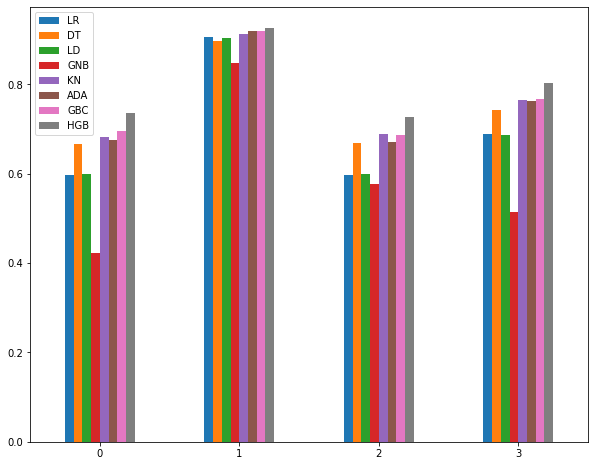

In [79]:
df=pd.DataFrame({'LR' : LR_res, 'DT': DT_res,'LD':LD_res,'GNB':GNB_res, 'KN': KN_res,'ADA':ADA_res,'GBC':GBC_res,"HGB":HGB_res}, index=['0','1',"2","3"])
df.plot.bar(rot=0,figsize=(10,8));

In [102]:
 HGB=HistGradientBoostingClassifier(max_iter=1100,verbose=1,max_leaf_nodes=99,n_iter_no_change=50,   early_stopping=False,warm_start=True)

In [ ]:
HGB_res2=[]

In [116]:
from sklearn.metrics import confusion_matrix
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
HGB.set_params(max_iter=5100)
for i in [0]:
    HGB.fit(X_train_train,y_train_train[:,i])
    HGB_score=HGB.score(X_train_test,y_train_test[:,i] )    
    HGB_res2.append(HGB_score)


eaves (99 on avg), max depth = 21, in 0.455s
[4823/5100] 3 trees, 297 leaves (99 on avg), max depth = 22, in 0.315s
[4824/5100] 3 trees, 297 leaves (99 on avg), max depth = 23, in 0.521s
[4825/5100] 3 trees, 297 leaves (99 on avg), max depth = 22, in 0.327s
[4826/5100] 3 trees, 297 leaves (99 on avg), max depth = 22, in 0.588s
[4827/5100] 3 trees, 297 leaves (99 on avg), max depth = 23, in 0.336s
[4828/5100] 3 trees, 297 leaves (99 on avg), max depth = 21, in 0.544s
[4829/5100] 3 trees, 297 leaves (99 on avg), max depth = 21, in 0.316s
[4830/5100] 3 trees, 297 leaves (99 on avg), max depth = 19, in 0.377s
[4831/5100] 3 trees, 297 leaves (99 on avg), max depth = 25, in 0.520s
[4832/5100] 3 trees, 297 leaves (99 on avg), max depth = 20, in 0.390s
[4833/5100] 3 trees, 297 leaves (99 on avg), max depth = 25, in 0.507s
[4834/5100] 3 trees, 297 leaves (99 on avg), max depth = 24, in 0.376s
[4835/5100] 3 trees, 297 leaves (99 on avg), max depth = 21, in 0.569s
[4836/5100] 3 trees, 297 leaves 

In [117]:
HGB_res2

[0.744150364403529,
 0.744150364403529,
 0.7433831990794016,
 0.7403145377828922,
 0.7391637897967012,
 0.7353279631760644]

In [118]:
pred = HGB.predict(X_train_test)
print(confusion_matrix(y_train_test[:,0], pred))

[[ 126  123    7]
 [  61 1225  209]
 [   5  285  566]]


In [146]:
# ITT kezdődik az okítási ciklus IDe jön vissza

In [34]:
def reconvert (X):
    yo=[]
    o=1
    y1=X
    for idx,_ in enumerate(y1):
       if y1[idx][0]==max(y1[idx][0],y1[idx][1],y1[idx][2]):
           o=1
       if y1[idx][1]==max(y1[idx][0],y1[idx][1],y1[idx][2]):
           o=2
       if y1[idx][2]==max(y1[idx][0],y1[idx][1],y1[idx][2]):
           o=3
       '''
       ox=o
       if ox==3 and yerror[idx]:
           o=2
       if ox==1 and yerror[idx]:
           o=2
       if ox==2 and yerror[idx]:
           # 2 eset van 
           if y3[idx]>y1[idx]:
               o=3
           else:
               o=1

       '''
       
       yo.append(o)
    return(yo)
    

In [149]:

yhibaold=[]
maxlen=len(y_train_train)
#maxlen=1000
stimm=0
for idx,_ in enumerate(y1):
    if idx in range(0,maxlen):
        ou1=y1[idx]
        ou2=y2[idx]
        ou3=y3[idx]
        ouh=yhiba_pred[idx]
        match=(y_train_train[idx][0]==1 and ou1==max(ou1,ou2,ou3)) or (y_train_train[idx][0]==2 and ou2==max(ou1,ou2,ou3)) or (y_train_train[idx][0]==3 and ou3==max(ou1,ou2,ou3)) 
        if match:
            yhibaold.append(0)
            stimm+=1
        else:
            yhibaold.append(1)
        if idx%10000==1:
            print(f"{y_train_train[idx]} :{ou1:6.3f} _ {ou2:6.3f} _ {ou3:6.3f} _ {match}_{ouh:6.3f}")

print(maxlen,stimm,stimm/maxlen) 
#print(yhiba)



[2. 0. 1. 0.] : 0.009 _  0.225 _  0.620 _ False_ 0.000
[1. 1. 0. 0.] : 0.593 _  0.363 _  0.126 _ True_ 0.000
[2. 0. 1. 0.] : 0.476 _  0.494 _  0.048 _ True_ 0.000
[2. 0. 1. 0.] :-0.003 _  0.432 _  0.602 _ False_ 0.000
[2. 0. 1. 0.] : 0.177 _  0.727 _  0.109 _ True_ 0.000
[3. 0. 0. 1.] :-0.007 _  0.429 _  0.575 _ True_ 0.000
[2. 0. 1. 0.] : 0.140 _  0.759 _  0.128 _ True_ 0.000
[2. 0. 1. 0.] : 0.154 _  0.659 _  0.166 _ True_ 0.000
[3. 0. 0. 1.] :-0.005 _  0.120 _  0.877 _ True_ 0.000
[1. 1. 0. 0.] : 0.147 _  0.615 _  0.228 _ False_ 0.000
[2. 0. 1. 0.] :-0.010 _  0.148 _  0.862 _ False_ 0.000
[1. 1. 0. 0.] : 0.670 _  0.397 _ -0.040 _ True_ 0.000
[2. 0. 1. 0.] : 0.004 _  0.193 _  0.829 _ False_ 0.000
[3. 0. 0. 1.] : 0.002 _  0.458 _  0.531 _ True_ 0.000
[3. 0. 0. 1.] :-0.009 _  0.104 _  0.893 _ True_ 0.000
[3. 0. 0. 1.] : 0.004 _  0.452 _  0.556 _ True_ 0.000
[1. 1. 0. 0.] : 0.320 _  0.561 _  0.132 _ False_ 0.000
[2. 0. 1. 0.] : 0.013 _  0.816 _  0.161 _ True_ 0.000
[3. 0. 0. 1.] :-0.009 

In [154]:
def show_similarity(a,b):
    for i in range(min(len(a),1000)):
        print(f"{a[i]}-{b[i]} ",end="")

In [155]:
def search_outliers(y_t1,y_pred,X_orig,yrealpred):
    y1=[] # y orig 
    x1=[] # X orig
    yp=[] # y predikt
    yrp=[] # y predicted real value
    for inx,i in enumerate(y_t1):
        if y_t1[inx][0]==y_pred[inx]:
            pass
        else:
            y1.append(y_t1[inx][0])
            x1.append(X_orig[inx])
            yp.append(y_pred[inx])
            yrp.append(yrealpred[inx])
    out=(y1,yp,x1,yrp)
    return out






In [156]:
# futtass ez felett !!

In [37]:
ypred2=ann2(X_train_test)
io=reconvert(ypred2)
check_similarity_np(io,y_train_test[:,0])

hiba:698 max:2607 -- error: 26.7741 good %: 73.2259 %


0.7322593018795551

In [38]:
ypred1=ann2.predict(X_train_train)
io=reconvert(ypred1)
check_similarity_np(io,y_train_train[:,0])

hiba:67590 max:257994 -- error: 26.1983 good %: 73.8017 %


0.7380171631898416

In [91]:
ypred1

array([[0.15499848, 0.76536214, 0.0816348 ],
       [0.00503527, 0.14800292, 0.8563725 ],
       [0.45224142, 0.5335499 , 0.01439941],
       ...,
       [0.2014128 , 0.5197657 , 0.3004445 ],
       [0.01349376, 0.28768444, 0.70185846],
       [0.0423561 , 0.74841315, 0.21801093]], dtype=float32)

In [40]:
#outfile generation
y_pred_ok=ann2.predict(X_pred_scale)
io=reconvert( y_pred_ok)

X_pred_bd=pd.read_csv(basedir+"/orig/test_values.csv")

#y_pred_ok_int=conv_a_floatlist(y_pred_ok,range_x)

In [41]:
buildingid=X_pred_bd["building_id"]

head2=y_pred_ok


outdf=pd.DataFrame(data={"damage_grade":io} ,index=buildingid)
outdf.index.name="building_id"


outdf.head()
st=43
sts=str(st)
outdf.to_csv(basedir+"/out/submission_"+sts+"_xgboost.csv")
print()
print(basedir+"/out/submission_"+sts+"_xgboost.csv")


C:/Users/sipocz/OneDrive/Dokumentumok/GitHub/_EarthQuake/gpos_lin/out/submission_43_xgboost.csv


In [ ]:
if not( _PCVERSION_):
    !head "/content/drive/My Drive/001_AI/_EarthQuake/gpos_lin/out/submission_24_xgboost.csv"

In [167]:
X_pred_scale

array([[0.28571429, 0.0201005 , 0.06593407, ..., 0.        , 1.        ,
        0.56170323],
       [0.14285714, 0.02512563, 0.13186813, ..., 0.        , 1.        ,
        0.19576828],
       [0.14285714, 0.00502513, 0.03296703, ..., 0.        , 1.        ,
        0.71028087],
       ...,
       [0.        , 0.05025126, 0.02197802, ..., 0.        , 1.        ,
        0.73558512],
       [0.14285714, 0.00502513, 0.08791209, ..., 0.        , 0.        ,
        0.21615666],
       [0.14285714, 0.01005025, 0.10989011, ..., 0.        , 1.        ,
        0.83998508]])

<img src="https://www.python.org/static/community_logos/python-logo-master-v3-TM.png" title="Python Logo"/>